In [2]:
from __future__ import absolute_import, division, print_function
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
##Scatter matrix plot
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
### Multiple Linear Regression
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

##LAsso and Ridge and other regressors
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
##Logistic Regression
from sklearn.linear_model import LogisticRegression
##KNN
from sklearn.neighbors import KNeighborsClassifier
##Measuring Accuracy of the Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
data_dir = 'E:/Umesh-MAY2022/NEU-052022/Courses/SpringB-May-June2022/ALY6020/Weekly Sessions/Week 1 - Intro-KNN/Lab'
os.chdir(data_dir)

In [4]:
raw_data = pd.read_csv("knn-data.csv")
raw_test = pd.read_csv("knntestdata.csv")

In [5]:
raw_data.head()

,Age,PurchaseAmount,Approval
0,44,204,No
1,35,183,Yes
2,41,221,No
3,40,158,Yes
4,40,280,No


In [6]:
X_train = raw_data.drop(columns='Approval')
y_train = raw_data['Approval']
X_test = raw_test.drop(columns='Approval')
y_test = raw_test['Approval']

In [7]:
X_train.head()

,Age,PurchaseAmount
0,44,204
1,35,183
2,41,221
3,40,158
4,40,280


In [8]:
X_test.head()

,Age,PurchaseAmount
0,37,523
1,41,621
2,32,686
3,33,690


In [9]:
knn_model = KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
knn_model.classes_

array(['No', 'Yes'], dtype=object)

# Making Predictions

In [11]:
predicted = knn_model.predict(X_test)

In [12]:
predicted

array(['No', 'No', 'Yes', 'Yes'], dtype=object)

# Measuring Accuracy of the model

In [13]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [14]:
print(confusion_matrix(y_test, predicted))

[[2 0]
 [0 2]]


# CHoosing an Optimal Value of K Using the Elbow Method

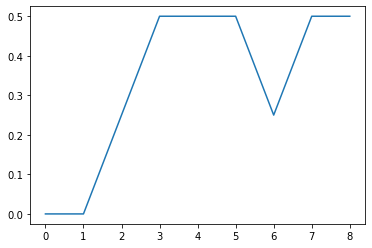

In [15]:
err = []
for i in np.arange(1,10):
    knn_new = KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(X_train, y_train)
    new_predicted = knn_new.predict(X_test)
    err.append(np.mean(new_predicted != y_test))
plt.plot(err)